In [6]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# reading all the results
files = [
    "data/results/results_ros.csv",
    "data/results/results_rus.csv",
    "data/results/results_smote.csv",
    "data/results/results_st.csv",
    "data/results/results_adasyn.csv",
    "data/results/results_bs.csv",
]

# merge all into one DataFrame
df_all = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# save combined
df_all.to_csv("data/results/all_model_comparisons.csv", index=False)

print("Combined results saved to 'all_model_comparisons.csv'")

Combined results saved to 'all_model_comparisons.csv'


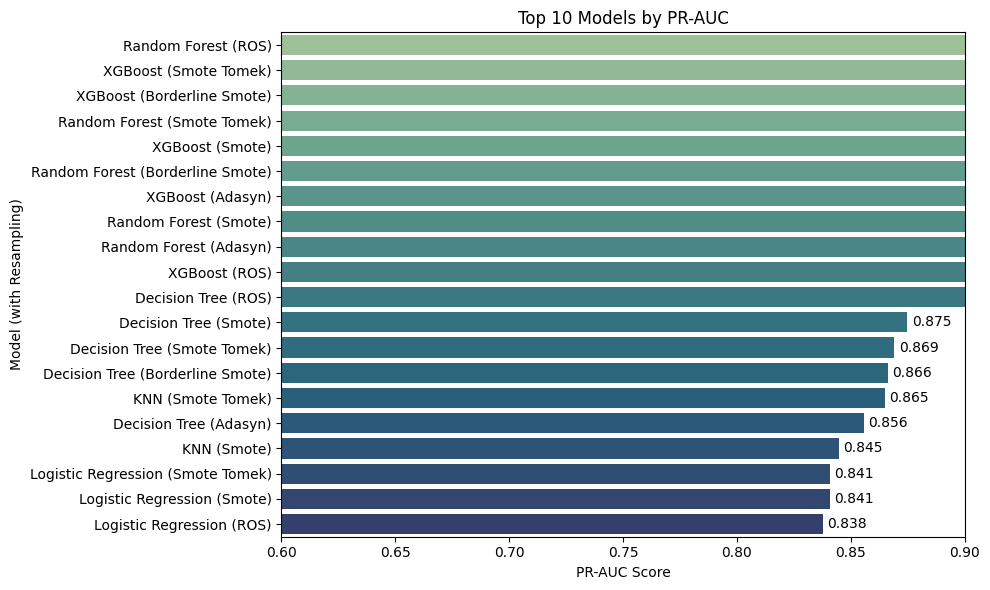

In [8]:
# best 10 models by PR-AUC
top_n = df_all.sort_values(by="PR-AUC", ascending=False).head(20).copy()

top_n["Label"] = top_n["Model"] + " (" + top_n["Resampling"] + ")"

# plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_n, y="Label", x="PR-AUC", hue="Label", palette="crest", legend=False)


# writing the scores
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", padding=3)

plt.title("Top 10 Models by PR-AUC")
plt.xlabel("PR-AUC Score")
plt.ylabel("Model (with Resampling)")
plt.xlim(0.6, 0.9)
plt.tight_layout()
plt.show()

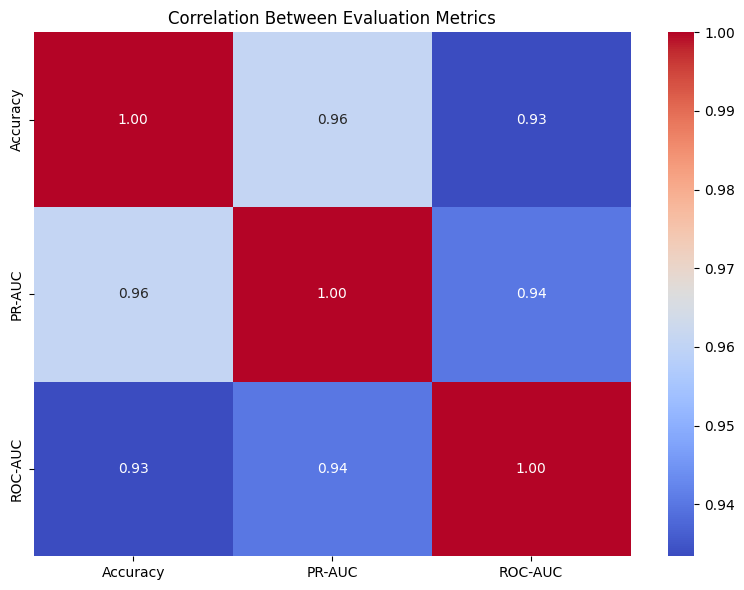

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_all[["Accuracy", "PR-AUC", "ROC-AUC"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Evaluation Metrics")
plt.tight_layout()
plt.show()


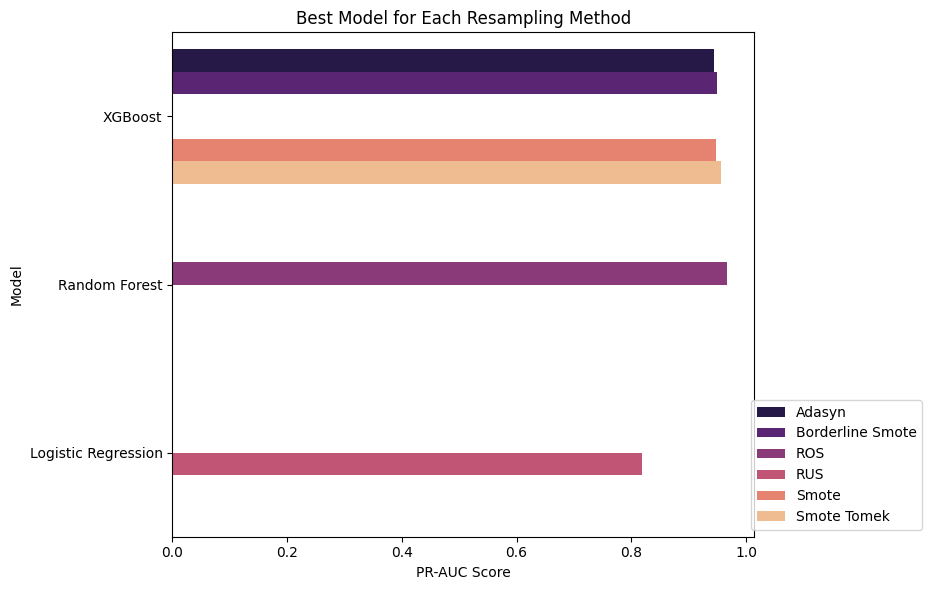

In [11]:
best_per_resampling = df_all.loc[df_all.groupby("Resampling")["PR-AUC"].idxmax()]
plt.figure(figsize=(10, 6))
sns.barplot(data=best_per_resampling, y="Model", x="PR-AUC", hue="Resampling", palette="magma")
plt.title("Best Model for Each Resampling Method")
plt.xlabel("PR-AUC Score")
plt.ylabel("Model")
plt.legend(loc="lower right", bbox_to_anchor=(1.3, 0))
plt.tight_layout()
plt.show()


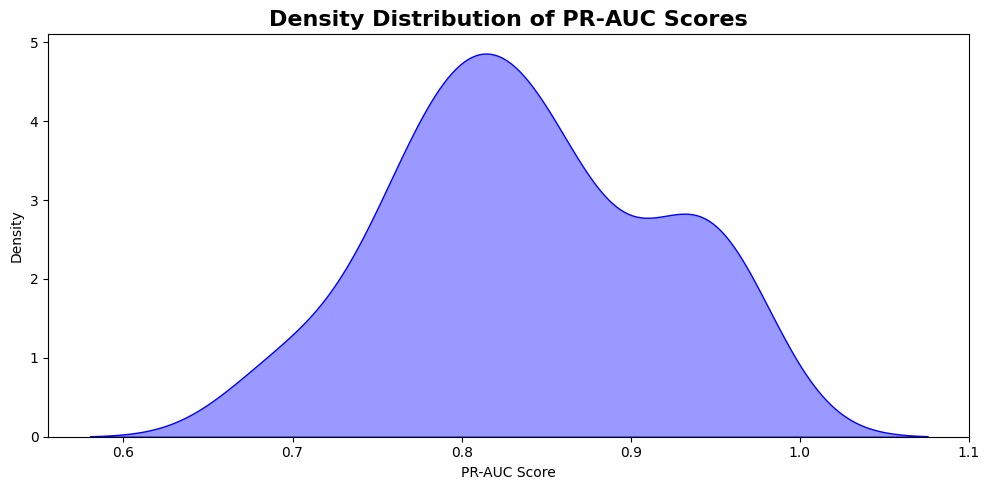

In [13]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_all["PR-AUC"], fill=True, color="blue", alpha=0.4)
plt.title("Density Distribution of PR-AUC Scores", fontsize=16, weight="bold")
plt.xlabel("PR-AUC Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()



What It Shows:
Peak around 0.8: Most models have PR-AUC scores clustered around 0.8, indicating many models achieve similar performance in this range.

Spread of Scores: The density extends from approximately 0.6 to 1.1, showing the variety in model performance.

Low Density Beyond 0.9: Few models have PR-AUC scores above 0.9, suggesting high performance is rare.

The KDE plot illustrates the density distribution of PR-AUC scores, with a peak around 0.8, indicating that most models perform within this range. A smaller number of models achieve scores above 0.9, highlighting the challenge of maximizing precision-recall trade-offs.

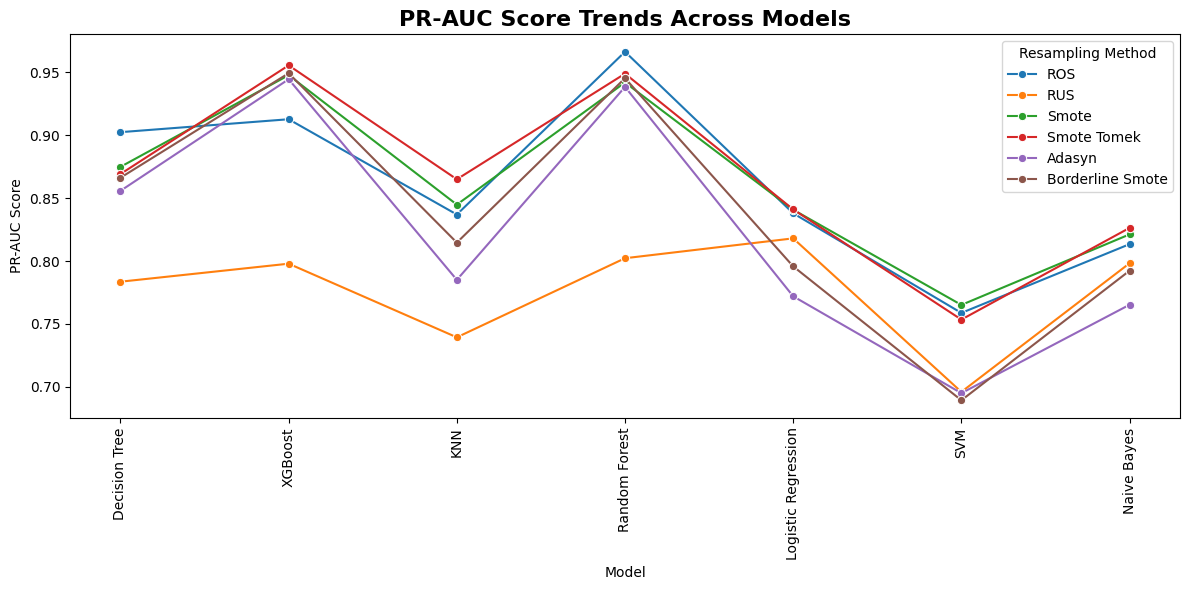

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="Model", y="PR-AUC", hue="Resampling", marker="o", palette="tab10")
plt.title("PR-AUC Score Trends Across Models", fontsize=16, weight="bold")
plt.xlabel("Model")
plt.ylabel("PR-AUC Score")
plt.xticks(rotation=90)
plt.legend(title="Resampling Method")
plt.tight_layout()
plt.show()


In [23]:
import plotly.graph_objects as go

# Example structure for linking models to score ranges
model_scores = df_all[["Model", "PR-AUC"]]
score_ranges = pd.cut(model_scores["PR-AUC"], bins=[0.6, 0.7, 0.8, 0.9, 1.0], labels=["Low", "Moderate", "High", "Very High"])
links = model_scores.assign(ScoreRange=score_ranges)

# Build Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(label=list(links["Model"].unique()) + ["Low", "Moderate", "High", "Very High"]),  # Explicit category labels
    link=dict(source=[links["Model"].tolist().index(m) for m in links["Model"]],
              target=[["Low", "Moderate", "High", "Very High"].index(s) + len(links["Model"].unique()) for s in links["ScoreRange"]],
              value=[1] * len(links))
))

fig.update_layout(title_text="Model Contribution to PR-AUC Score Ranges", font_size=12)
fig.show()



In [24]:
print(links["ScoreRange"].value_counts())


ScoreRange
High         16
Moderate     12
Very High    11
Low           3
Name: count, dtype: int64
